In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

ModuleNotFoundError: No module named 'cvxpy'

A sparse signal denoising seeks to remove noise, errors, or perturbations from a signal. Extensive research has been devoted to this arena over the last several decades, and as a result, today's denoisers can effectively remove large amounts of additive white Gaussian noise. A compressed sensing (CS) reconstruction algorithm seeks to recover a structured signal acquired using a small number of randomized measurements

In [3]:
x = np.array(  [0.2, 0.5, 0.6, 0.8, 1] + [0] * (128-5) )
x = x[ np.random.permutation(128) - 1 ];

Text(0.5, 1.0, 'Initiate x with nonzero coefficients')

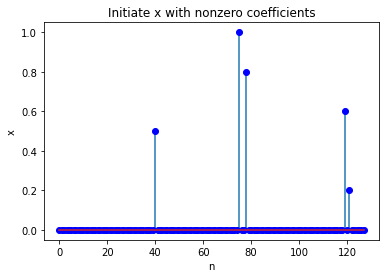

In [4]:
plt.stem(x,markerfmt='bo')
plt.ylabel("x")
plt.xlabel("n")
plt.title("Initiate x with nonzero coefficients")

This is a sparse signal 

In [10]:
y = x + 0.05 * np.random.randn( 128 )
y

array([ 1.28609780e-02,  1.02046030e-02,  2.19305744e-02,  4.44066390e-02,
       -1.10998795e-02,  4.15647423e-02, -5.56619689e-02, -3.07998768e-02,
       -1.20725133e-02,  2.24974544e-02,  4.13149400e-02,  2.73359122e-02,
       -5.66418327e-02, -2.15562679e-02, -6.59858038e-02, -3.71607604e-02,
        1.03730995e-02,  4.77030180e-03, -4.56221360e-02,  5.54348406e-02,
       -3.82317732e-02, -2.71277630e-02,  6.60939739e-02,  8.09576196e-02,
       -3.32490972e-02,  2.59411332e-02, -6.61740177e-02, -2.26538806e-02,
       -1.31641966e-01,  1.62296679e-02,  1.04165032e-01, -8.18391642e-02,
       -8.11870554e-02, -6.28548864e-03, -6.14484219e-02, -2.78759127e-02,
        4.24680441e-02, -1.44105716e-02,  7.73553524e-02, -6.70219766e-02,
        4.53184861e-01, -5.99918890e-03, -4.44606655e-04,  6.61967836e-02,
       -5.93351094e-02,  3.81688679e-02,  4.28767680e-02,  9.11672569e-02,
        9.75711264e-02, -2.98304530e-02, -1.74787916e-02, -3.44757436e-02,
       -9.63122177e-03, -

Corrupt sparse signal with random Gaussian noise σ = 0.05 (y = x + n):

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Signals with Gaussian noise')

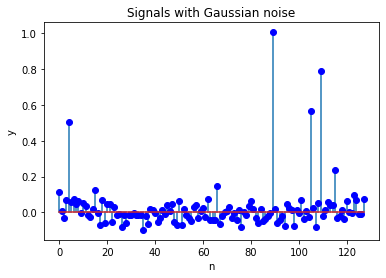

In [52]:
plt.stem(y,markerfmt='bo')
plt.ylabel("y")
plt.xlabel("n")
plt.title("Signals with Gaussian noise")

ℓ2-norm denoising trades the norm of the solution with data consistency. The solution of this problem is:
$$\hat{x}=\frac{1}{1+\lambda} y$$

When $\lambda$ = 0.1:

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Tychoov penality with $\\lambda=1$')

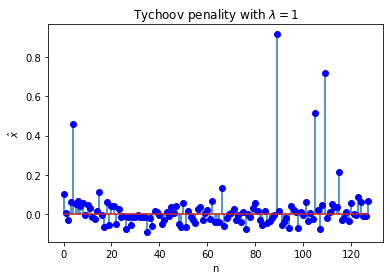

In [53]:
xhat=(1/(1+0.1))*y
plt.stem(xhat,markerfmt='bo')
plt.ylabel("$\hat{x}$")
plt.xlabel("n")
plt.title("Tychoov penality with $\lambda=1$")

The solution from the above graph is sparse.

Let us see the solution with different lambda values:

0.01
0.05


/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


0.1
0.2


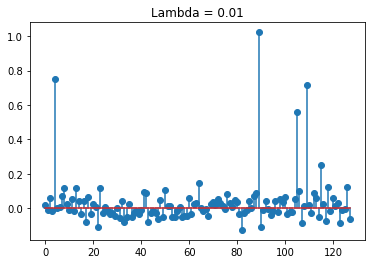

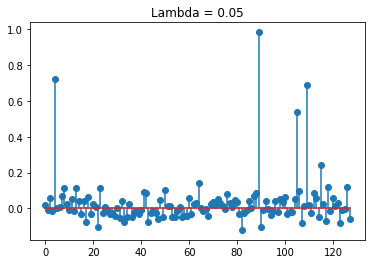

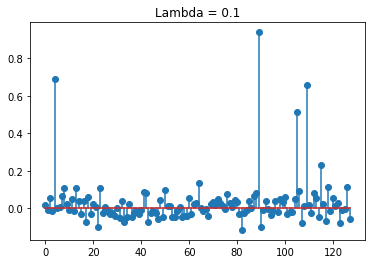

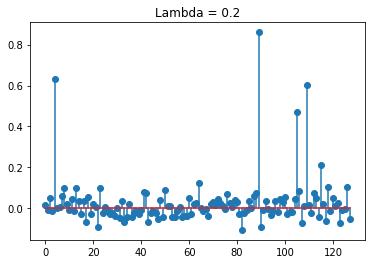

In [7]:
for i in [0.01, 0.05, 0.1, 0.2]:
    print(i)
    plt.figure()
    xhat=(1/(1+i))*y
    plt.stem(xhat)
    plt.title("Lambda = "+str(i))


To minimize each seperately we can create the problem:
$$\operatorname{argmin} \frac{1}{2}\left|\hat{x_{i}}-y_{i}\right|^{2}+\lambda\left|\hat{x_{i}}\right|$$

Soft-thresholding or shrinkage is the solution to this problem:
$$\hat{x}=\left\{\begin{array}{ccc}
y+\lambda & \text { if } & y<-\lambda \\
0 & \text { if } & |y|<\lambda \\
y-\lambda & \text { if } & y>\lambda
\end{array}\right.$$

In [8]:
def SoftThresh(y, t):
    if y > t: 
        return y - t
    elif y < -t: 
        return y + t
    else: 
        return 0

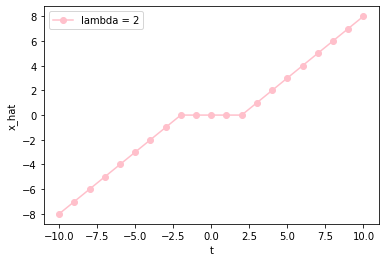

In [9]:
lamda=2
x_hat=[]
y_new=[]
for i in range(-10,11):
    x_hat.append(SoftThresh(i, lamda))
    y_new.append(i)
plt.plot(y_new,x_hat,'o-', color='pink',label='lambda = 2')
plt.xlabel("t")
plt.ylabel("x_hat")
plt.legend()
#print(x_hat)    
#y

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
No handles with labels found to put in legend.


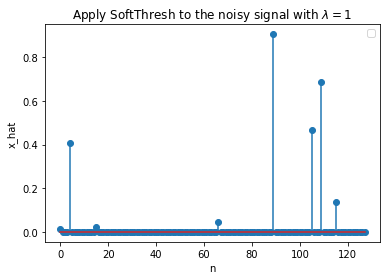

In [54]:
lamda=0.1
x_hat=[]
for i in y:
    x_hat.append(SoftThresh(i, lamda))
plt.stem(x_hat)
plt.ylabel("x_hat")
plt.xlabel("n")
plt.title("Apply SoftThresh to the noisy signal with $\lambda =1$")
plt.legend()

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

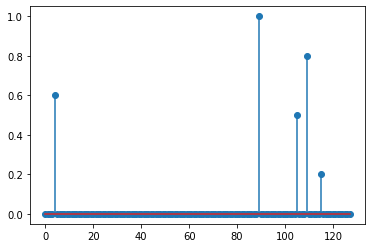

In [12]:
plt.stem(x)

So by comparing two graphs, we can see that by using the soft thresholding method, it removes most of the noises successfully and return back to the sparse signal we created.

Compute the unitary Discrete Fourier transform of the sparse signal,  X=Fx , where  F  is a Fourier transform operator:

In [13]:
X = np.fft.fft(x_hat);

With the undersampled Fourier transform, we are measuring a subset of the Fourier transform of our signal, $X_{u}=F_{u} x$, where $F_{u}$ is a Fourier transform evaluated only at a subset of frequency domain samples. This is an underdetermined system for which there are infinitely many signals that yield a consistent solution. However, we do know that the original signal is sparse, so there is hope that we will be able to reconstruct it.

In [14]:
Xu = np.zeros(128, dtype='complex');
Xu[::4] = X[::4]
xu = np.fft.ifft(Xu) * 4 #This is the minimum  l2  norm solution 

In [15]:
t = np.linspace(0, 128, 128)

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


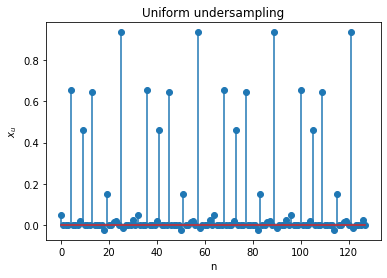

In [56]:
plt.stem(xu.real)
plt.xlabel("n")
plt.ylabel("$x_{u}$")
plt.title("Uniform undersampling")
plt.show()#Plot the real part 

We can undersample the data by taking 32 random samples. Compute the zero-filled inverse Fourier transform and multiply by  4  again:

In [17]:
Xr = np.zeros(128, dtype='complex');
prm = np.random.permutation(128) - 1
Xr[ prm[:32] ] = X[ prm[:32] ];
xr = np.fft.ifft(Xr) * 4

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


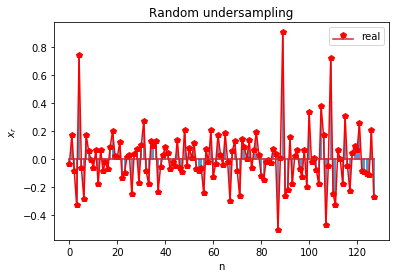

In [58]:
plt.stem(xr.real,markerfmt='r-p', label='real')
plt.legend()
plt.xlabel("n")
plt.ylabel("$x_{r}$")
plt.title("Random undersampling")
plt.show()#reconstruct the sparse signal